In [ ]:
"""
Alperen Görmez
Jan 16, 2020
"""

In [24]:
# import the necessary libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
teamIndex = {}

teamIndex["ArsenalFC"] = 0
teamIndex["AFCBournemouth"] = 1
teamIndex["Brighton&HoveAlbion"] = 2
teamIndex["BurnleyFC"] = 3
teamIndex["ChelseaFC"] = 4
teamIndex["CrystalPalace"] = 5
teamIndex["EvertonFC"] = 6
teamIndex["HuddersfieldTown"] = 7
teamIndex["LeicesterCity"] = 8
teamIndex["LiverpoolFC"] = 9
teamIndex["ManchesterCity"] = 10
teamIndex["ManchesterUnited"] = 11
teamIndex["NewcastleUnited"] = 12
teamIndex["SouthamptonFC"] = 13
teamIndex["StokeCity"] = 14
teamIndex["SwanseaCity"] = 15
teamIndex["TottenhamHotspur"] = 16
teamIndex["WatfordFC"] = 17
teamIndex["WestBromwichAlbion"] = 18
teamIndex["WestHamUnited"] = 19

teamResults = {}
# 0: history of goals scored at home
# 1: history of goals conceded at home
# 2: history of goals conceded at away
# 3: history of goals scored at away
# 4: history of goals scored
# 5: history of goals conceded
numFeatures = 6

teamResults["ArsenalFC"] = [ [] for i in range( numFeatures) ]
teamResults["AFCBournemouth"] = [ [] for i in range( numFeatures) ]
teamResults["Brighton&HoveAlbion"] = [ [] for i in range( numFeatures) ]
teamResults["BurnleyFC"] = [ [] for i in range( numFeatures) ]
teamResults["ChelseaFC"] = [ [] for i in range( numFeatures) ]
teamResults["CrystalPalace"] = [ [] for i in range( numFeatures) ]
teamResults["EvertonFC"] = [ [] for i in range( numFeatures) ]
teamResults["HuddersfieldTown"] = [ [] for i in range( numFeatures) ]
teamResults["LeicesterCity"] = [ [] for i in range( numFeatures) ]
teamResults["LiverpoolFC"] = [ [] for i in range( numFeatures) ]
teamResults["ManchesterCity"] = [ [] for i in range( numFeatures) ]
teamResults["ManchesterUnited"] = [ [] for i in range( numFeatures) ]
teamResults["NewcastleUnited"] = [ [] for i in range( numFeatures) ]
teamResults["SouthamptonFC"] = [ [] for i in range( numFeatures) ]
teamResults["StokeCity"] = [ [] for i in range( numFeatures) ]
teamResults["SwanseaCity"] = [ [] for i in range( numFeatures) ]
teamResults["TottenhamHotspur"] = [ [] for i in range( numFeatures) ]
teamResults["WatfordFC"] = [ [] for i in range( numFeatures) ]
teamResults["WestBromwichAlbion"] = [ [] for i in range( numFeatures) ]
teamResults["WestHamUnited"] = [ [] for i in range( numFeatures) ]

In [14]:
# read the raw data
f = open('epl1718.txt', "r")
lines = f.readlines()
f.close()

In [15]:
data = np.zeros((380,52)) # 38 weeks = 380 matches, 2*6 + 20 + 20 = 52 features
label = np.zeros((380,))

In [16]:
matchNo = 0
for line in lines:
    if (line == "\n") or ("Matchday" in line):
        pass
    else:
        line = line.replace(" ", "") # remove spaces
        line = line.replace("\n", "") # remove \n character
        
        m = re.search(r"\d", line) # search an integer in the line
        i = m.start() # the index of first integer in the line
        
        homeTeamName = line[:i]
        homeTeamScore = int( line[i])
        awayTeamName = line[i+3:]
        awayTeamScore = int( line[i+2])
        
        
        """
        add the current result to the teamResults
        """      
        
        teamResults[ homeTeamName][0].append( homeTeamScore)
        teamResults[ homeTeamName][1].append( awayTeamScore)
        #teamResults[ homeTeamName][2].append( )
        #teamResults[ homeTeamName][3].append( )
        teamResults[ homeTeamName][4].append( homeTeamScore)
        teamResults[ homeTeamName][5].append( awayTeamScore)
        
        #teamResults[ awayTeamName][0].append( )
        #teamResults[ awayTeamName][1].append( )
        teamResults[ awayTeamName][2].append( homeTeamScore)
        teamResults[ awayTeamName][3].append( awayTeamScore)
        teamResults[ awayTeamName][4].append( awayTeamScore)
        teamResults[ awayTeamName][5].append( homeTeamScore)
        

        """
        add the current result to the dataset
        """
        # for home team
        # avg. goals scored at home
        # avg. goals conceded at home
        # avg. goals conceded at away
        # avg. goals scored at away
        # avg. goals scored at last 5 matches
        # avg. goals conceded at last 5 matches
        
        # for away team
        # avg. goals scored at home
        # avg. goals conceded at home
        # avg. goals conceded at away
        # avg. goals scored at away
        # avg. goals scored at last 5 matches
        # avg. goals conceded at last 5 matches
        
        # which team is home, which team is away
        
        
        data[matchNo][ 0] = np.mean( teamResults[ homeTeamName][0])
        data[matchNo][ 1] = np.mean( teamResults[ homeTeamName][1])
        data[matchNo][ 2] = np.mean( teamResults[ homeTeamName][2])
        data[matchNo][ 3] = np.mean( teamResults[ homeTeamName][3])
        
        if len( teamResults[ homeTeamName][4]) >= 5:
            data[matchNo][ 4] = np.sum( teamResults[ homeTeamName][4][-5:]) / 5.0
        else:
            data[matchNo][ 4] = np.sum( teamResults[ homeTeamName][4][-5:]) / len( teamResults[ homeTeamName][4])
        
        if len( teamResults[ homeTeamName][5]) >= 5:
            data[matchNo][ 5] = np.sum( teamResults[ homeTeamName][5][-5:]) / 5.0
        else:
            data[matchNo][ 5] = np.sum( teamResults[ homeTeamName][5][-5:]) / len( teamResults[ homeTeamName][5])

            
        
        data[matchNo][ 6] = np.mean( teamResults[ awayTeamName][0])
        data[matchNo][ 7] = np.mean( teamResults[ awayTeamName][1])
        data[matchNo][ 8] = np.mean( teamResults[ awayTeamName][2])
        data[matchNo][ 9] = np.mean( teamResults[ awayTeamName][3])
        
        if len( teamResults[ awayTeamName][4]) >= 5:
            data[matchNo][ 10] = np.sum( teamResults[ awayTeamName][4][-5:]) / 5.0
        else:
            data[matchNo][ 10] = np.sum( teamResults[ awayTeamName][4][-5:]) / len( teamResults[ awayTeamName][4])
        
        if len( teamResults[ homeTeamName][5]) >= 5:
            data[matchNo][ 11] = np.sum( teamResults[ awayTeamName][5][-5:]) / 5.0
        else:
            data[matchNo][ 11] = np.sum( teamResults[ awayTeamName][5][-5:]) / len( teamResults[ awayTeamName][5])
        
        
        homeTeamIndex = teamIndex[ homeTeamName]
        awayTeamIndex = teamIndex[ awayTeamName]
        
        data[matchNo][12+homeTeamIndex] = 1.0
        data[matchNo][32+awayTeamIndex] = 1.0
        
        label[ matchNo] = ( (homeTeamScore + awayTeamScore) >= 2.5 )
        
        matchNo += 1

data = np.nan_to_num(data) # to handle division by 0's when no away games are played for example

C:\Users\Alperen\Anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Alperen\Anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


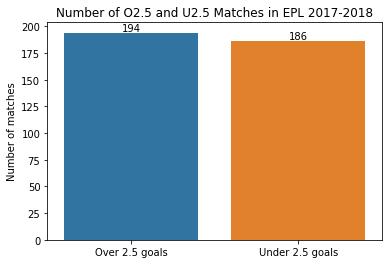

In [29]:
o = label[label == 1.]
u = label[label == 0.]

g = sns.barplot( ["Over 2.5 goals", "Under 2.5 goals"], [len(o), len(u)])

for p in g.patches:
    g.annotate( format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Number of O2.5 and U2.5 Matches in EPL 2017-2018')
plt.ylabel('Number of matches')
plt.show()

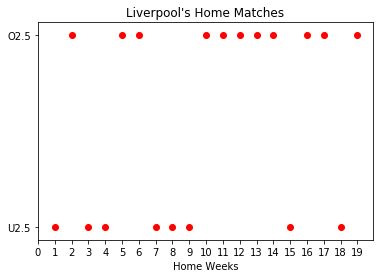

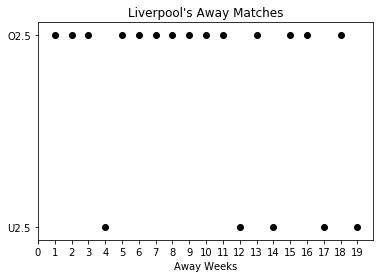

In [56]:
liv_homeMatches = np.empty([19])
weekNumbers = np.arange(1,20)
for weekNo in weekNumbers:
    liv_homeMatches[weekNo-1] = (teamResults["LiverpoolFC"][0][weekNo-1] + teamResults["LiverpoolFC"][1][weekNo-1]) >= 2.5

liv_awayMatches = np.empty([19])
weekNumbers = np.arange(1,20)
for weekNo in weekNumbers:
    liv_awayMatches[weekNo-1] = (teamResults["LiverpoolFC"][2][weekNo-1] + teamResults["LiverpoolFC"][3][weekNo-1]) >= 2.5


plt.scatter( weekNumbers, liv_homeMatches, c="r")
plt.xlabel("Home Weeks")
plt.title("Liverpool's Home Matches")
plt.xticks(np.arange(20))
plt.yticks(np.arange(2), ("U2.5", "O2.5"))
plt.show()

plt.scatter( weekNumbers, liv_awayMatches, c="k")
plt.xlabel("Away Weeks")
plt.title("Liverpool's Away Matches")
plt.xticks(np.arange(20))
plt.yticks(np.arange(2), ("U2.5", "O2.5"))
plt.show()

In [40]:
# discard first 5 weeks
garbage_data = data[:10*5][:]
garbage_label = label[:10*5]

# weeks 6-23 are training data (18 matches for each team)
x_train = data[10*5:10*23][:]
y_train = label[10*5:10*23]

# weeks 24-30 are validation data (7 matches for each team)
x_val = data[10*23:10*30][:]
y_val = label[10*23:10*30]

# weeks 31-38 are test data (8 matches for each team)
x_test = data[10*30:][:]
y_test = label[10*30:]

In [50]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add( layers.Dense(28, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add( layers.Dropout(0.1))
model.add( layers.Dense(14, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add( layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=2,
                    validation_data=(x_val, y_val))

Train on 180 samples, validate on 70 samples
Epoch 1/30
180/180 [==============================] - 3s 18ms/step - loss: 0.7698 - acc: 0.4333 - val_loss: 0.7444 - val_acc: 0.4857
Epoch 2/30
180/180 [==============================] - 1s 3ms/step - loss: 0.7281 - acc: 0.4833 - val_loss: 0.7341 - val_acc: 0.4857
Epoch 3/30
180/180 [==============================] - 0s 3ms/step - loss: 0.7066 - acc: 0.5556 - val_loss: 0.7330 - val_acc: 0.5000
Epoch 4/30
180/180 [==============================] - 0s 3ms/step - loss: 0.6870 - acc: 0.5944 - val_loss: 0.7304 - val_acc: 0.5000
Epoch 5/30
180/180 [==============================] - 0s 3ms/step - loss: 0.6881 - acc: 0.5778 - val_loss: 0.7151 - val_acc: 0.5429
Epoch 6/30
180/180 [==============================] - 0s 3ms/step - loss: 0.6770 - acc: 0.6000 - val_loss: 0.6964 - val_acc: 0.6000
Epoch 7/30
180/180 [==============================] - 0s 3ms/step - loss: 0.6458 - acc: 0.6889 - val_loss: 0.6980 - val_acc: 0.5714
Epoch 8/30
180/180 [==========

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 28)                1484      
_________________________________________________________________
dropout_5 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 14)                406       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 15        
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________


In [53]:
%matplotlib inline

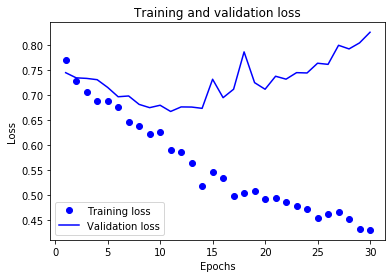

In [54]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

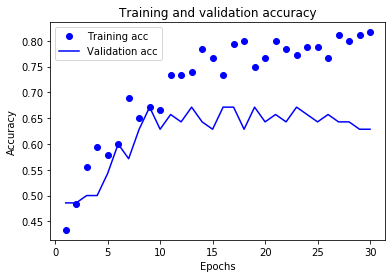

In [55]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [57]:
model = models.Sequential()
model.add( layers.Dense(28, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add( layers.Dropout(0.1))
model.add( layers.Dense(14, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add( layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=2,
                    validation_data=(x_val, y_val))

Train on 180 samples, validate on 70 samples
Epoch 1/10
180/180 [==============================] - 1s 6ms/step - loss: 0.7241 - acc: 0.5944 - val_loss: 0.7281 - val_acc: 0.5143
Epoch 2/10
180/180 [==============================] - 0s 3ms/step - loss: 0.7025 - acc: 0.5333 - val_loss: 0.7092 - val_acc: 0.5286
Epoch 3/10
180/180 [==============================] - 0s 3ms/step - loss: 0.6873 - acc: 0.5611 - val_loss: 0.7028 - val_acc: 0.5714
Epoch 4/10
180/180 [==============================] - 0s 3ms/step - loss: 0.6794 - acc: 0.6167 - val_loss: 0.7164 - val_acc: 0.5000
Epoch 5/10
180/180 [==============================] - 0s 3ms/step - loss: 0.6649 - acc: 0.6167 - val_loss: 0.6960 - val_acc: 0.5000
Epoch 6/10
180/180 [==============================] - 0s 3ms/step - loss: 0.6532 - acc: 0.6111 - val_loss: 0.6904 - val_acc: 0.5429
Epoch 7/10
180/180 [==============================] - 0s 3ms/step - loss: 0.6363 - acc: 0.6722 - val_loss: 0.6852 - val_acc: 0.5571
Epoch 8/10
180/180 [===========

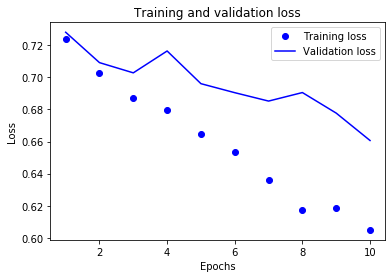

In [58]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

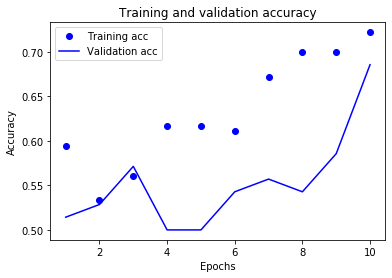

In [59]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [60]:
model.evaluate( x_test, y_test)

80/80 [==============================] - 0s 4ms/step


[0.6611515164375306, 0.675]

In [ ]:
test_set_acc = []
for i in range( 100):
    model = models.Sequential()
    model.add( layers.Dense(28, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add( layers.Dropout(0.1))
    model.add( layers.Dense(14, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add( layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train,
                        y_train,
                        epochs=10,
                        batch_size=2,
                        validation_data=(x_val, y_val))
    test_set_acc.append( model.evaluate( x_test, y_test)[1])

In [62]:
sum(test_set_acc) / len(test_set_acc)

0.6031250000000001

In [ ]:
# optional training at the end, with validation set included
history = model.fit(data[:10*30][:],
                    label[:10*30],
                    epochs=11,
                    batch_size=2)

In [ ]:
model.evaluate( x_test, y_test)